## 4. Polynomial Regression과 오버피팅, 언더피팅 이해

###  다항 회귀 이해

앞서 설명한 회귀는 독립변수(feature)와 종속변수(target)의 관계가 일차 방정식 형태로 표현된 회귀이다.  
회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 __다항(Polynomial) 회귀__라고 한다.  
$$ y = w_0 + w_1*x_1 + w_2*x_2 + w_3*x_1*x_2 + w_4*x_1^2 + w_5*x_2^2 ...$$  
  
다항 회귀는 __선형 회귀__이다  
  
위의 식은 새로운 변수인 $Z$를 $z = [x_1, x_2, x_1*x_2, x_1^2, x_2^2]$로 한다면  
$$ y = w_0 + w_1*z_1 + w_2*z_2 + w_3*z_3 + w_4*z_4 + w_5*z_5 ... $$  
로 표현할 수 있기 때문에 여전히 선형회귀이다.  
  
단순 선형 회귀 직선형을 표현한 것 보다 다항 회귀 곡선형으로 포현한 것이 더 예측 성능이 높을 수 있다.  
  


* $[x_1, x_2]$를 2차 다항값으로 $[1, x_1, x_2, x_1x_2, x_1^2, x_2^2]$로 변환

In [3]:
# PolynomialFeatures 클래스로 다항식 변환
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환된 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 반환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 features:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 features:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


* 3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성  
즉, 회귀식은 결정값 $y = 1+ 2x_1 + 3x_1^2 + 4x_2^3$ 

In [5]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n',X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


* $[x_1, x_2]$를 3차 다항값으로 $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3]$로 변환

In [8]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


* 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습  
  
사이킷런의 `Pipeline` 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링 할 수 있다. 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다.  
하지만 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다.  
  
__즉, 차수가 높아질수록 과적합의 문제가 크게 발생한다!__

* Cosiine 곡선에 약간의 Nosie 변동값을 더하여 실제값 곡선을 만듦

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Nosie 변동값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

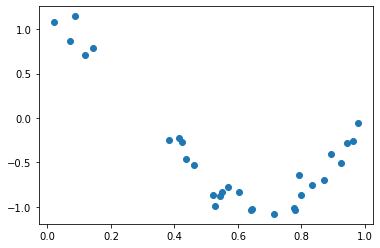

In [6]:
plt.scatter(X, y)
plt.show()

예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측결과를 비교해보자  


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.41 입니다.


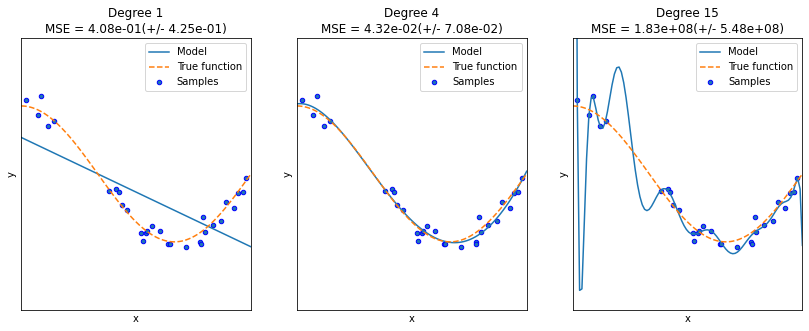

In [14]:
plt.figure(figsize = (14,5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks = (), yticks = ())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                        ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring = 'neg_mean_squared_error', cv = 10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = 'Model')
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label = 'True function')
    plt.scatter(X, y, edgecolor = 'b', s = 20, label = 'Samples')
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()


__실선__ 으로 표현된 예측 곡선은 다항 회귀 예측 곡선,
__점선__ 으로 표현된 곡선은 실제 데이터 세트 X, Y의 코사인 곡선이다.  
  
학습데이터는 0부터 1까지의 30개의 임임의 X 값과 그에 따른 코사인 Y 값에 잡음을 변동 값으로 추가해 구성하였으며, MSE 평가는 학습데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 것

* 왼쪽의 __`Degree 1`__ 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 똑같다. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순하다. __<u>예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델로 판단.</u>__  
MSE = 약 0.407  
  
* 가운데 __`Degree 4`__ 예측 곡선은 실제 데이터 세트와 유사한 모습을 보인다. 변동하는 잡음까지는 차마 예측하지 못하였지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델로 판단.  
MSE = 약 0.043으로 __<u>세 모델중 가장 뛰어난 예측 성능을 가짐</u>__  
  
* 오른쪽 __`Degree 15`__예측 곡선은 MSE 값이 182815433이 될 정도로 너무 큰 오류 값이 발생하였다. 예측 곡선을 보면 데이터 세트의 변동 잡음 값 까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어졌다.  
__<u>결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었고 높은 수준의 MSE 값이 나옴.</u>__  
  
***
결과적으로 좋은 예측 모델은 과적합도, 과소적합도 아닌 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 __균형 잡힌 모델을 의미함__을 알 수 있다.

### 편향-분산 트레이드오프(Bias_Variance Trade off)

편향-분산 트레이드오프는 머신러닝이 극복해야 할 가장 중요한 이슈 중의 하나이다.  
앞의 `Degree 1`과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 있다. 이런 모델을 __고편향(High Bias)__ 성을 가졌다고 표현한다.  
반대로 `Degree 15`와 같은 모델은 학습 데이터 하나하나 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게 되었다. 이러한 모델을 __고분산(High Variance)__ 성을 가진다고 표현한다.

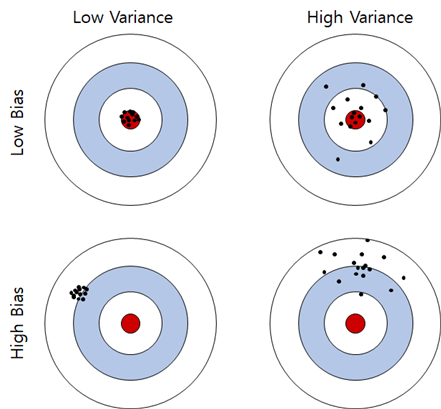

다음 그림은 편향-분산 트레이드오프를 설명하기 가장 좋은 예시이다.  
'양궁 과녁' 그래프는 편향과 분산의 고/저의 의미를 직관적으로 잘 표현하고 있다.  
  
* 왼쪽 상단의 그림의 `저편향/저분산`은 예측 결과가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 특정 부분에 집중돼 있는 아주 뛰어난 성능을 보여준다.  
  
* 우측 상단의 그림의 `저편향/고분산`은 예측 결과가 실제 결과에 비교접 근접하지만, 예측 결과가 실제 결과를 중심으로 꽤 넓은 부분에 분포되어 있다.  
  
* 왼쪽 하단의 그림의 `고편향/저분산`은 정확한 결과에서 벗어나면서 예측이 특정 부분에 집중되어 있다.  
  
* 우측 하단의 그림의 `고편향/고분산`은 정확한 예측 결과를 벗어나면서도 넓은 부분에 분포되어 있다.

일반적으로 편향과 분산은 한 쪽이 높으면 다른 한 쪽이 낮아지는 경향을 띈다.  
__즉, 편향이 높으면 분산이 낮아지고(과소적합), 분산이 높으면 편향이 낮아진다(과적합)__  
  
다음 그림은 편향과 분산의 관계에 따른 전체 오류 값(Total Error)의 변화를 잘 보여준다.

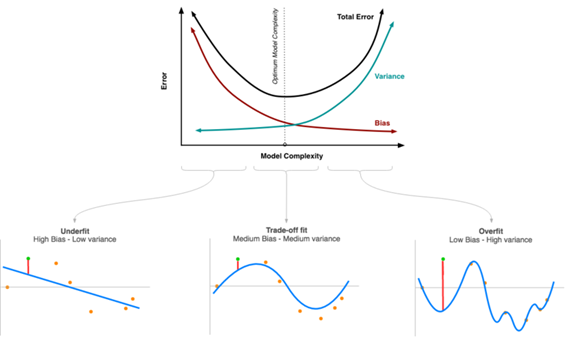

높은 편향/낮은 분산에서 과소적합이 되기 쉬우며, 낮은 편향/높은 분산에서 과적합이 일어나기 쉽다.  
  
편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.